In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import tensorflow
from keras.layers.convolutional import Conv1D , MaxPooling1D
from keras.utils import plot_model
from keras.models import Sequential , Model
from keras.layers import *
from keras import optimizers

In [2]:
dataset = pd.read_csv('train.csv' , index_col='date' , parse_dates=True)
dataset

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-02,1,1,11
2013-01-03,1,1,14
2013-01-04,1,1,13
2013-01-05,1,1,10
...,...,...,...
2017-12-27,10,50,63
2017-12-28,10,50,59
2017-12-29,10,50,74


In [3]:
dataset['month'] = dataset.index

In [4]:
print(dataset.shape)
print(dataset.isnull().sum())
print(dataset.dtypes)

(913000, 4)
store    0
item     0
sales    0
month    0
dtype: int64
store             int64
item              int64
sales             int64
month    datetime64[ns]
dtype: object


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 to 2017-12-31
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   store   913000 non-null  int64         
 1   item    913000 non-null  int64         
 2   sales   913000 non-null  int64         
 3   month   913000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 34.8 MB


In [6]:
dataset.groupby(["store"]).agg({"sales": ["count","sum", "mean", "median", "std", "min", "max"]})

sales                                               
       count      sum       mean median        std min  max
store                                                      
1      91300  4315603  47.268379   44.0  24.006252   1  155
2      91300  6120128  67.033165   62.0  33.595810   3  231
3      91300  5435144  59.530602   55.0  29.974102   3  196
4      91300  5012639  54.902946   51.0  27.733097   4  186
5      91300  3631016  39.770164   37.0  20.365757   2  130
6      91300  3627670  39.733516   37.0  20.310451   0  134
7      91300  3320009  36.363735   34.0  18.684825   1  122
8      91300  5856169  64.142048   60.0  32.231751   4  204
9      91300  5025976  55.049025   51.0  27.832186   4  195
10     91300  5360158  58.709288   54.0  29.554994   3  187

In [7]:
dataset.groupby(["item"]).agg({"sales": ["count","sum", "mean", "median", "std", "min", "max"]})

sales                                               
      count      sum       mean median        std min  max
item                                                      
1     18260   401384  21.981599   21.0   8.468922   1   59
2     18260  1069564  58.574151   56.0  20.093015   9  150
3     18260   669087  36.642223   35.0  13.179441   7  104
4     18260   401907  22.010241   21.0   8.403898   0   66
5     18260   335230  18.358708   18.0   7.265167   1   50
6     18260  1068281  58.503888   56.0  20.174898  11  148
7     18260  1068777  58.531051   56.0  20.146002  11  141
8     18260  1405108  76.950055   74.0  26.130697  15  181
9     18260   938379  51.389869   49.5  17.790158   6  134
10    18260  1337133  73.227437   70.0  24.823725  14  175
11    18260  1271925  69.656353   67.0  23.744732  11  170
12    18260  1271534  69.634940   67.0  23.738663  12  170
13    18260  1539621  84.316594   81.0  28.311031  20  210
14    18260  1071531  58.681873   56.0  20.079860  12  152
15    18260  1607442  88.030778   85.0  29.522852  17  231
16    18260   468480  25.656079   25.0   9.603270   2   70
17    18260   602486  32.994852   32.0  11.967610   4   83
18    18260  1538876  84.275794   81.0  28.430621  18  208
19    18260   736892  40.355531   39.0  14.332645   5   99
20    18260   867641  47.515936   46.0  16.490487   9  127
21    18260   736190  40.317087   39.0  14.338006   7  109
22    18260  1469971  80.502245   78.0  27.118163  14  214
23    18260   534979  29.297864   28.0  10.819549   3   81
24    18260  1205975  66.044633   64.0  22.531555  14  156
25    18260  1473334  80.686418   78.0  27.238817  18  193
26    18260   869981  47.644085   46.0  16.723912   8  119
27    18260   402628  22.049726   21.0   8.461641   1   59
28    18260  1604713  87.881325   85.0  29.501781  16  206
29    18260  1271240  69.618839   67.0  23.635631  15  173
30    18260   736554  40.337021   39.0  14.363331   5  115
31    18260  1070845  58.644304   57.0  20.104705  10  159
32    18260   803107  43.981763   42.0  15.574556   5  119
33    18260  1270183  69.560953   67.0  23.718343  15  169
34    18260   469935  25.735761   25.0   9.617910   2   79
35    18260  1201541  65.801807   63.0  22.461990  12  168
36    18260  1406548  77.028916   74.0  26.067440  16  188
37    18260   534258  29.258379   28.0  10.771547   3   74
38    18260  1470330  80.521906   77.0  27.141799  15  188
39    18260   801311  43.883406   42.0  15.511550   7  112
40    18260   534094  29.249398   28.0  10.822959   3   74
41    18260   401759  22.002136   21.0   8.402470   2   60
42    18260   669925  36.688116   35.0  13.215112   5   96
43    18260   936635  51.294359   49.0  17.801008   9  126
44    18260   536811  29.398193   28.0  10.797738   3   78
45    18260  1471467  80.584173   78.0  27.318402  18  205
46    18260  1070764  58.639869   56.0  20.220879  11  150
47    18260   401781  22.003341   21.0   8.420102   2   61
48    18260   937703  51.352848   49.0  17.881917   8  130
49    18260   535663  29.335323   28.0  10.874788   3   77
50    18260  1203009  65.882202   63.0  22.416031  12  164

In [8]:
dataset.groupby(['store','item']).agg({'sales':[ 'sum', 'mean', 'median', 'std']})

sales                             
               sum       mean median        std
store item                                     
1     1      36468  19.971522   19.0   6.741022
      2      97050  53.148959   52.0  15.005779
      3      60638  33.208105   33.0  10.072529
      4      36440  19.956188   20.0   6.640618
      5      30335  16.612815   16.0   5.672102
...            ...        ...    ...        ...
10    46    120601  66.046550   65.0  18.114991
      47     45204  24.755750   24.0   7.924820
      48    105570  57.814896   57.0  15.898538
      49     60317  33.032311   32.0  10.091610
      50    135192  74.037240   73.0  19.937566

[500 rows x 4 columns]

C:\Users\kunwa\AppData\Local\Temp\ipykernel_15332\2301865591.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset.groupby(['date'])['sales'].sum())


Text(0.5, 1.0, 'Sales distribution when grouped by dates ')

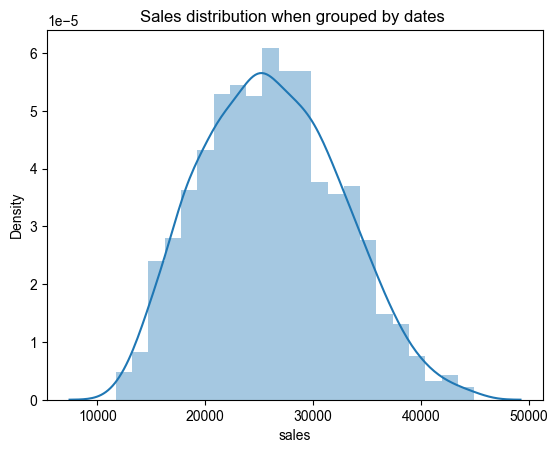

In [9]:
sns.distplot(dataset.groupby(['date'])['sales'].sum())
sns.set(rc={'figure.figsize':(15.7,6.27)})
plt.title('Sales distribution when grouped by dates ')

Text(0, 0.5, 'Sales ')

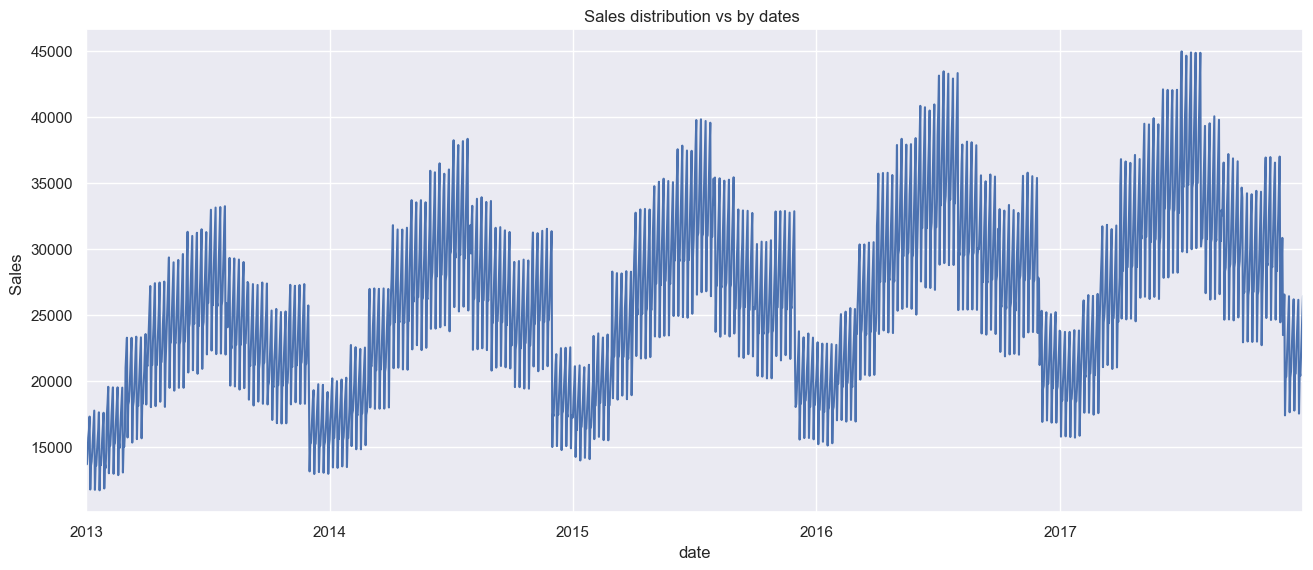

In [10]:
dataset.groupby(['date'])['sales'].sum().plot()
plt.title('Sales distribution vs by dates ')
plt.ylabel('Sales ')

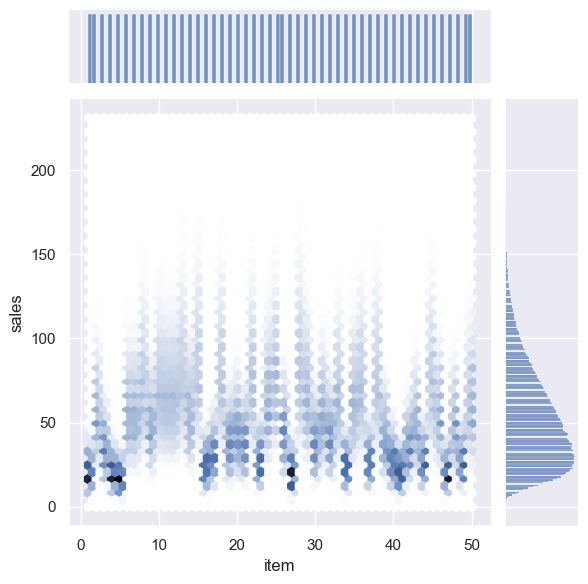

In [11]:
sns.jointplot(x='item' , y = 'sales' , data = dataset , kind='hex')

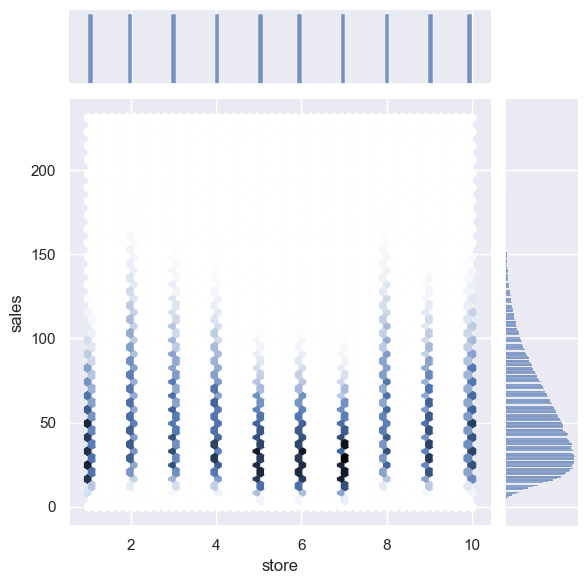

In [12]:
sns.jointplot(x='store' , y = 'sales' , data = dataset , kind='hex')

In [13]:
dataset_eda = dataset
dataset_eda['date'] = dataset_eda.index

In [14]:
dataset_eda['weekday'] = dataset_eda['date'].dt.dayofweek

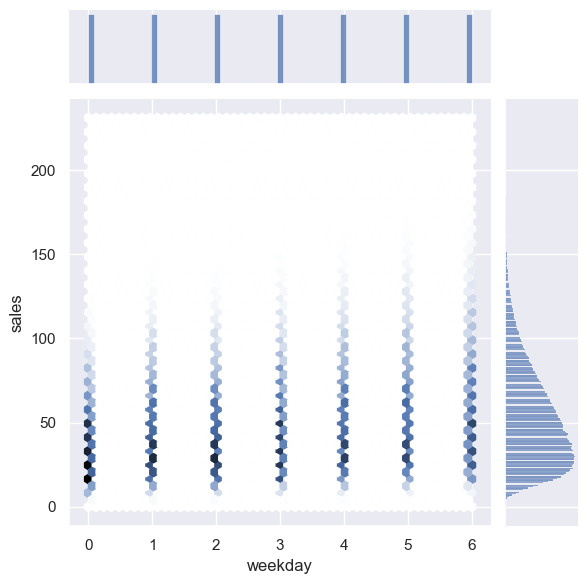

In [15]:
sns.jointplot(x='weekday' , y = 'sales' , data = dataset_eda , kind='hex')

C:\Users\kunwa\AppData\Local\Temp\ipykernel_15332\1655827521.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_eda['sales'])


<Axes: xlabel='sales', ylabel='Density'>

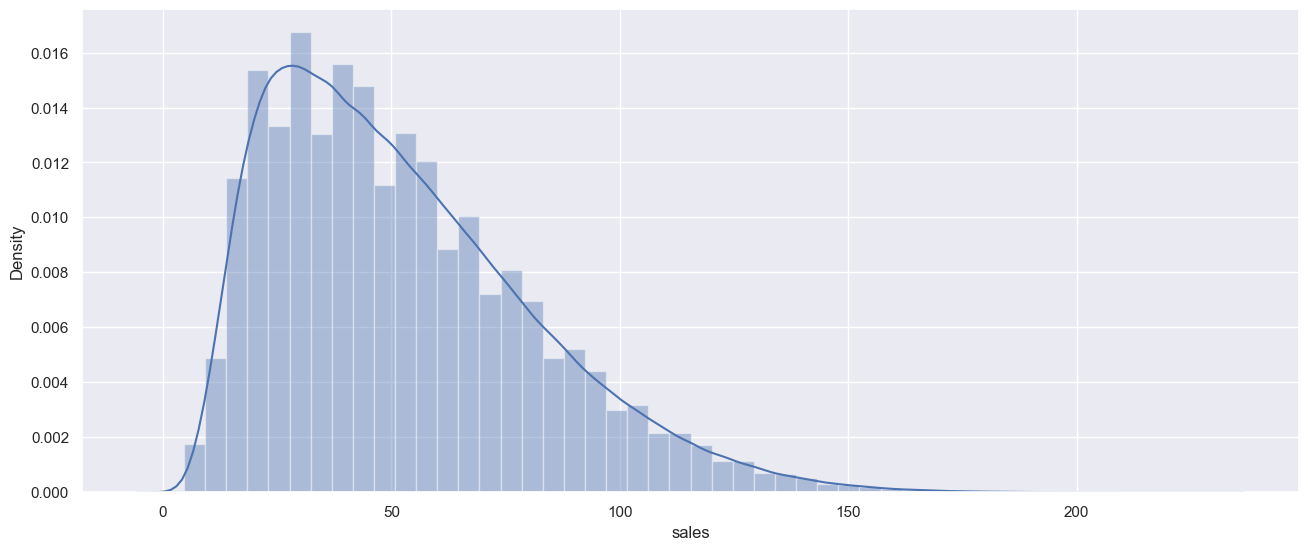

In [16]:
sns.distplot(dataset_eda['sales'])

In [17]:
dataset = dataset.drop(['month' , 'date' , 'weekday'] , axis = 1)

In [18]:
dataset_sample = dataset.loc[(dataset.index <= '2013-12-31')]

Text(0, 0.5, 'Sales ')

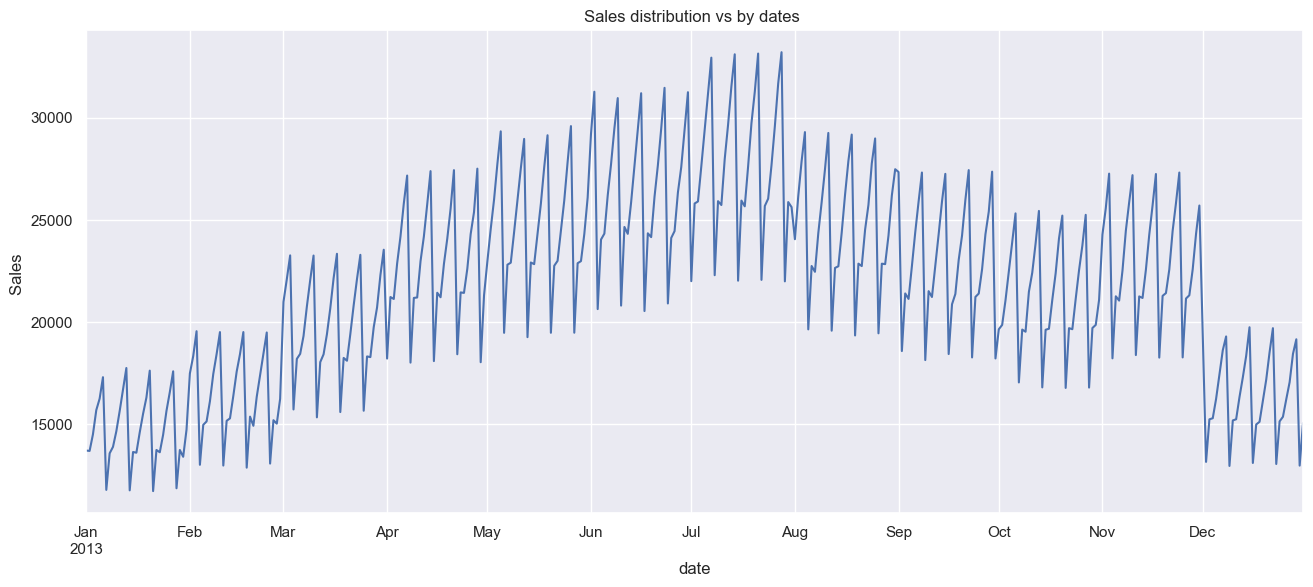

In [19]:
dataset_sample.groupby(['date'])['sales'].sum().plot()
plt.title('Sales distribution vs by dates ')
plt.ylabel('Sales ')

### Inference
1.We can see that the sales is consistently increasing form the month of January to the month of July after which there is a dip in sales for three consequetive months again there is a slight increase in sales in the month of November after which it starts decreasing again.

2.There is slight dip in sales in last december and start of january also

3.Max Sales -> July

  Min Sales -> January


In [20]:
dataset_series = dataset.loc[(dataset["item"] == 7)& (dataset["store"] == 5)]
dataset_series

,store,item,sales
date,,,
2013-01-01,5,7,21
2013-01-02,5,7,16
2013-01-03,5,7,25
2013-01-04,5,7,28
2013-01-05,5,7,32
...,...,...,...
2017-12-27,5,7,38
2017-12-28,5,7,39
2017-12-29,5,7,40


In [21]:
from statsmodels.tsa.stattools import acf
acf_values = acf(dataset_series['sales'] , nlags=40)
acf_values

array([1.        , 0.56284238, 0.49079916, 0.4449345 , 0.43929605,
       0.4742669 , 0.55576388, 0.7191773 , 0.53175308, 0.46856263,
       0.41790325, 0.40614107, 0.46538598, 0.52462319, 0.68273244,
       0.49810489, 0.43456724, 0.38491014, 0.39253268, 0.42827265,
       0.48800283, 0.6567712 , 0.47905806, 0.41372958, 0.35662426,
       0.35874714, 0.3953069 , 0.45670357, 0.62098202, 0.46193634,
       0.38619907, 0.33210333, 0.32822847, 0.37983874, 0.42213134,
       0.57800462, 0.4170337 , 0.3526033 , 0.29769543, 0.28408736,
       0.34210213])

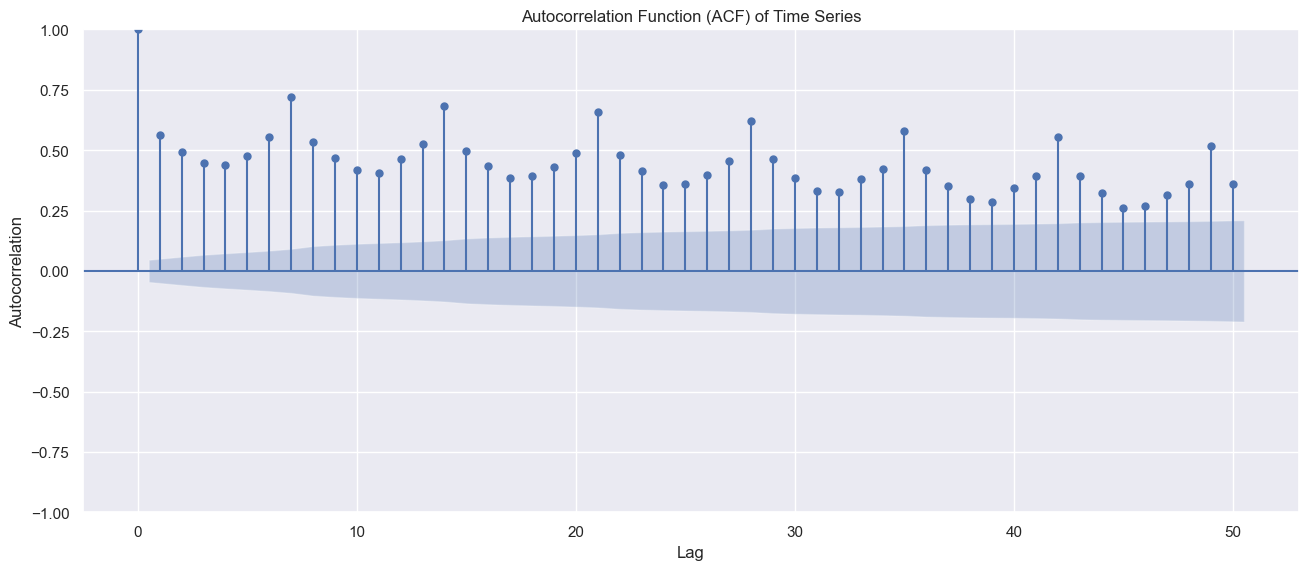

In [22]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(dataset_series['sales'] , lags = 50)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) of Time Series')
plt.show()

In [23]:
from statsmodels.tsa.stattools import pacf
pacf_values = pacf(dataset_series['sales'])
pacf_values

array([ 1.00000000e+00,  5.63150790e-01,  2.55100901e-01,  1.50206191e-01,
        1.46492883e-01,  1.89166490e-01,  2.75630933e-01,  4.89797882e-01,
        1.66833515e-02, -9.16970654e-03, -3.41633124e-02, -3.48138464e-02,
        5.41383567e-02,  4.12372473e-02,  2.67112428e-01, -4.35137659e-02,
       -5.17931410e-02, -5.20206106e-02, -4.41797780e-04, -2.32613860e-02,
       -1.44224874e-02,  2.09576597e-01, -1.19536863e-02, -2.60999059e-02,
       -6.11814232e-02, -3.54540013e-02, -3.48266025e-02, -2.44327543e-02,
        1.47931802e-01,  2.36520152e-02, -3.36678764e-02, -4.13333748e-02,
       -3.98334825e-02])

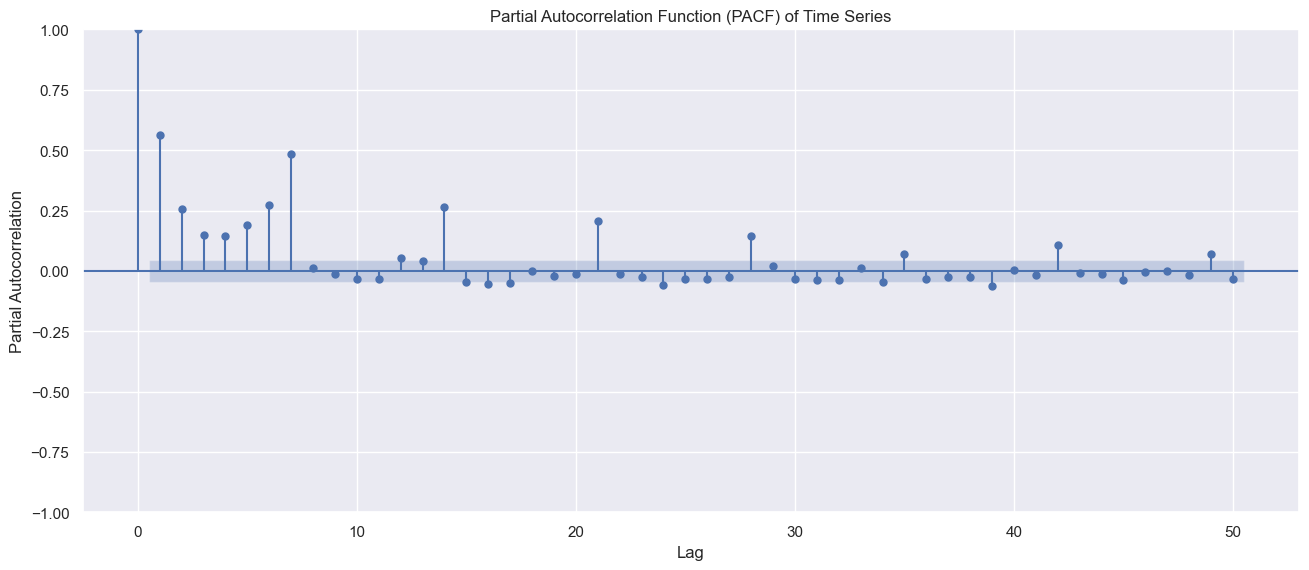

In [24]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(dataset_series['sales'] , lags = 50)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF) of Time Series')
plt.show()

### **CONCLUSION**

FROM THE ACF VALUES WE CANNOT DETERMINE ANYTHING SUBSTANTIAL AS IT GIVES INDIRECT RELATIONS OF THE CURRENT VALUE WITH THE PREVIOUS VALUES AS WELL SO WE NEED TO CONSIDER THE PACF VALUES.

FROM THE PACF VALUES(WHICH GIVES DIRECT RELATION ONLY) WE CAN SEE THAT THE CURRENT VALUES ARE STRONGLY DEPENDENT ON THE PREVIOUS SALES DATA ON THE SAME DAY OF THE WEEK ALONG WITH THE SALES DATA OF THE PREVIOUS WEEK.

### **Preparing the Train Dataset**

-> So now, we make our training dataset.

-> The train dataset would consist of columns containing sales data of the previous week along with the sales data of the same day of the week from the 7 previous weeks


In [25]:
past_data = 7
for i in range (past_data):
    new_column_name_1 = f'Sales_{(i+1)*7}'
    dataset_series.loc[: , new_column_name_1] = dataset_series['sales'].shift(+(i+1)*7)
    if(i!=7):
        new_column_name_2 = f'Sales_{i+1}'
        dataset_series.loc[: , new_column_name_2] = dataset_series['sales'].shift(+(i+1))

C:\Users\kunwa\AppData\Local\Temp\ipykernel_15332\34771202.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_series.loc[: , new_column_name_1] = dataset_series['sales'].shift(+(i+1)*7)
C:\Users\kunwa\AppData\Local\Temp\ipykernel_15332\34771202.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_series.loc[: , new_column_name_2] = dataset_series['sales'].shift(+(i+1))
C:\Users\kunwa\AppData\Local\Temp\ipykernel_15332\34771202.py:4: SettingWithCopyWarning: 
A value is trying to be set on a c

NUMBER OF NaN VALUES GENERATED

In [26]:
len(dataset_series) - len(dataset_series.dropna())

49

In [27]:
dataset_series = dataset_series.dropna()
dataset_series

,store,item,sales,Sales_7,Sales_1,Sales_14,Sales_2,Sales_21,Sales_3,Sales_28,Sales_4,Sales_35,Sales_5,Sales_42,Sales_6,Sales_49
date,,,,,,,,,,,,,,,,
2013-02-19,5,7,27,21.0,26.0,22.0,37.0,29.0,33.0,19.0,25.0,31.0,26.0,28.0,25.0,21.0
2013-02-20,5,7,29,25.0,27.0,23.0,26.0,28.0,37.0,23.0,33.0,25.0,25.0,27.0,26.0,16.0
2013-02-21,5,7,24,26.0,29.0,24.0,27.0,26.0,26.0,25.0,37.0,30.0,33.0,24.0,25.0,25.0
2013-02-22,5,7,30,25.0,24.0,34.0,29.0,31.0,27.0,25.0,26.0,28.0,37.0,28.0,33.0,28.0
2013-02-23,5,7,32,33.0,30.0,37.0,24.0,34.0,29.0,35.0,27.0,28.0,26.0,21.0,37.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27,5,7,38,34.0,31.0,27.0,23.0,41.0,56.0,61.0,41.0,46.0,39.0,53.0,28.0,48.0
2017-12-28,5,7,39,28.0,38.0,38.0,31.0,36.0,23.0,47.0,56.0,58.0,41.0,55.0,39.0,67.0
2017-12-29,5,7,40,39.0,39.0,41.0,38.0,36.0,31.0,40.0,23.0,72.0,56.0,52.0,41.0,62.0


In [28]:
dataset_series = dataset_series.drop(['store' , 'item'] , axis =1)

<Axes: >

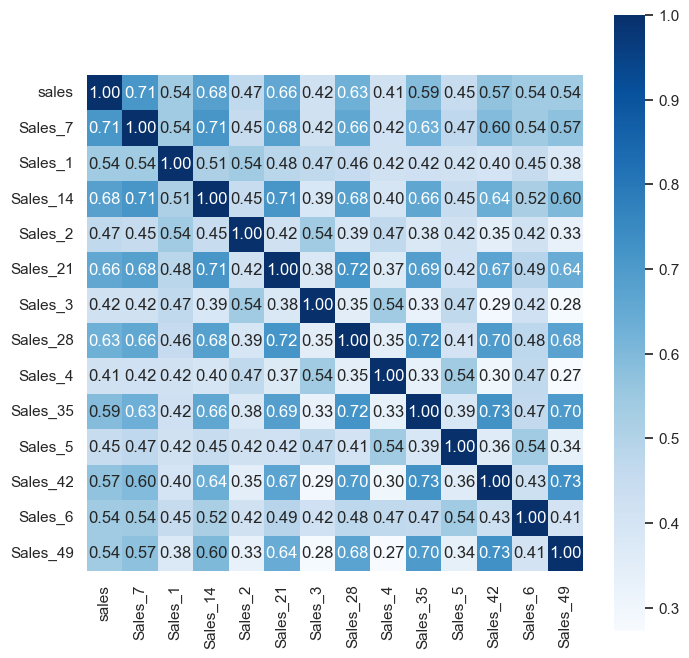

In [29]:
correlation_matrix = dataset_series.corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlation_matrix , annot= True ,cmap = 'Blues' , square= True, cbar = True , fmt = '0.2f')

In [30]:
X = dataset_series.drop(['sales'] , axis =1)
Y = dataset_series['sales']

In [31]:
print(X)
print(Y)

            Sales_7  Sales_1  Sales_14  Sales_2  Sales_21  Sales_3  Sales_28  \
date                                                                           
2013-02-19     21.0     26.0      22.0     37.0      29.0     33.0      19.0   
2013-02-20     25.0     27.0      23.0     26.0      28.0     37.0      23.0   
2013-02-21     26.0     29.0      24.0     27.0      26.0     26.0      25.0   
2013-02-22     25.0     24.0      34.0     29.0      31.0     27.0      25.0   
2013-02-23     33.0     30.0      37.0     24.0      34.0     29.0      35.0   
...             ...      ...       ...      ...       ...      ...       ...   
2017-12-27     34.0     31.0      27.0     23.0      41.0     56.0      61.0   
2017-12-28     28.0     38.0      38.0     31.0      36.0     23.0      47.0   
2017-12-29     39.0     39.0      41.0     38.0      36.0     31.0      40.0   
2017-12-30     41.0     40.0      51.0     39.0      36.0     38.0      38.0   
2017-12-31     56.0     39.0      52.0  

In [32]:
X_train , X_test , Y_train , Y_test = X[:-182], X[-182:], Y[:-182], Y[-182:]
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1595, 13)
(1595,)
(182, 13)
(182,)


In [33]:
epochs = 10
batch = 5
lr = 0.0003
adam = optimizers.Adam(lr)

In [34]:
X_train_series = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_series = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

In [35]:
X_test_series.shape

(182, 13, 1)

In [36]:
# model_cnn = Sequential()
# model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_series.shape[1], X_train_series.shape[2])))
# model_cnn.add(MaxPooling1D(pool_size=2))
# model_cnn.add(Flatten())
# model_cnn.add(Dense(50, activation='relu'))
# model_cnn.add(Dense(1))
# model_cnn.compile(loss='mse', optimizer=adam)
# model_cnn.summary()

In [37]:
model_dense = Sequential()
# model_dense.add(LSTM(64 , activation ='relu' , input_shape=(X_train_series.shape[1], X_train_series.shape[2])))
model_dense.add(Dense(1000, activation='relu', input_dim=X_train.shape[1]))
model_dense.add(Dense(100, activation = 'relu'))
model_dense.add(Dense(1))
model_dense.compile(loss='mse', optimizer=adam , metrics = ['mean_squared_error'])
model_dense.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              14000     
                                                                 
 dense_1 (Dense)             (None, 100)               100100    
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 114,201
Trainable params: 114,201
Non-trainable params: 0
_________________________________________________________________


In [38]:
model_history = model_dense.fit(X_train , Y_train , epochs=epochs, verbose=2)

Epoch 1/10
50/50 - 1s - loss: 134.0624 - mean_squared_error: 134.0624 - 538ms/epoch - 11ms/step
Epoch 2/10
50/50 - 0s - loss: 63.3692 - mean_squared_error: 63.3692 - 117ms/epoch - 2ms/step
Epoch 3/10
50/50 - 0s - loss: 59.3461 - mean_squared_error: 59.3461 - 117ms/epoch - 2ms/step
Epoch 4/10
50/50 - 0s - loss: 58.5655 - mean_squared_error: 58.5655 - 119ms/epoch - 2ms/step
Epoch 5/10
50/50 - 0s - loss: 59.3888 - mean_squared_error: 59.3888 - 115ms/epoch - 2ms/step
Epoch 6/10
50/50 - 0s - loss: 57.9551 - mean_squared_error: 57.9551 - 120ms/epoch - 2ms/step
Epoch 7/10
50/50 - 0s - loss: 58.7606 - mean_squared_error: 58.7606 - 121ms/epoch - 2ms/step
Epoch 8/10
50/50 - 0s - loss: 57.6824 - mean_squared_error: 57.6824 - 119ms/epoch - 2ms/step
Epoch 9/10
50/50 - 0s - loss: 57.0317 - mean_squared_error: 57.0317 - 115ms/epoch - 2ms/step
Epoch 10/10
50/50 - 0s - loss: 59.4222 - mean_squared_error: 59.4222 - 114ms/epoch - 2ms/step


In [39]:
predictions_lstm = model_dense.predict(X_test)
results = pd.DataFrame(Y_test)
results['predicted_lstm'] = predictions_lstm

6/6 [==============================] - 0s 2ms/step


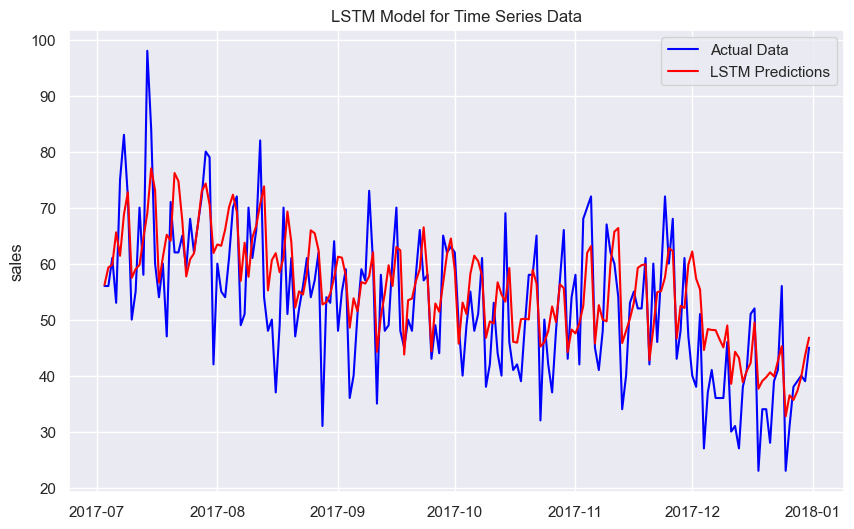

In [40]:
plt.rcParams['figure.figsize']=(10, 6)
plt.plot(results['sales'], label='Actual Data', color='blue')
plt.plot(results['predicted_lstm'], label='LSTM Predictions', color='red')
plt.ylabel('sales')
plt.title('LSTM Model for Time Series Data')
plt.legend()
plt.show()

In [41]:
model_history = model_dense.fit(X , Y , epochs=epochs, verbose=2)

Epoch 1/10
56/56 - 0s - loss: 61.1228 - mean_squared_error: 61.1228 - 138ms/epoch - 2ms/step
Epoch 2/10
56/56 - 0s - loss: 60.6424 - mean_squared_error: 60.6424 - 140ms/epoch - 2ms/step
Epoch 3/10
56/56 - 0s - loss: 58.5471 - mean_squared_error: 58.5471 - 131ms/epoch - 2ms/step
Epoch 4/10
56/56 - 0s - loss: 60.2791 - mean_squared_error: 60.2791 - 135ms/epoch - 2ms/step
Epoch 5/10
56/56 - 0s - loss: 59.3844 - mean_squared_error: 59.3844 - 132ms/epoch - 2ms/step
Epoch 6/10
56/56 - 0s - loss: 60.0881 - mean_squared_error: 60.0881 - 129ms/epoch - 2ms/step
Epoch 7/10
56/56 - 0s - loss: 60.4886 - mean_squared_error: 60.4886 - 133ms/epoch - 2ms/step
Epoch 8/10
56/56 - 0s - loss: 57.3665 - mean_squared_error: 57.3665 - 132ms/epoch - 2ms/step
Epoch 9/10
56/56 - 0s - loss: 59.6433 - mean_squared_error: 59.6433 - 136ms/epoch - 2ms/step
Epoch 10/10
56/56 - 0s - loss: 57.9971 - mean_squared_error: 57.9971 - 138ms/epoch - 2ms/step


In [42]:
new_data = dataset_series.iloc[-49:,0:1]

In [43]:
predict_dataset = pd.DataFrame()

In [44]:
past_data = 7
for i in range (past_data):
    new_column_name_1 = f'Sales_{(i+1)*7}'
    predict_dataset.loc[: , new_column_name_1] = new_data['sales'].shift(+(i+1)*7)
    if(i!=7):
        new_column_name_2 = f'Sales_{i+1}'
        predict_dataset.loc[: , new_column_name_2] = new_data['sales'].shift(+(i+1))

In [45]:
predict_dataset.head()

,Sales_7,Sales_1,Sales_14,Sales_2,Sales_21,Sales_3,Sales_28,Sales_4,Sales_35,Sales_5,Sales_42,Sales_6,Sales_49
date,,,,,,,,,,,,,
2017-11-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-14,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-15,NaN,40.0,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-16,NaN,53.0,NaN,40.0,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-17,NaN,55.0,NaN,53.0,NaN,40.0,NaN,34.0,NaN,NaN,NaN,NaN,NaN


In [46]:
new_row = {'sales' : 0}
last_date = new_data.index[-1]+ timedelta(days=1)

new_data = pd.concat([new_data, pd.DataFrame([new_row],index =[last_date])], ignore_index=False)

In [47]:
new_data.head()

,sales
2017-11-13,34
2017-11-14,40
2017-11-15,53
2017-11-16,55
2017-11-17,52


In [48]:
new_data_2= pd.DataFrame()
for i in range (past_data):
    new_column_name_1 = f'Sales_{(i+1)*7}'
    new_data_2.loc[: , new_column_name_1] = new_data['sales'].shift(+(i+1)*7)
    if(i!=7):
        new_column_name_2 = f'Sales_{i+1}'
        new_data_2.loc[: , new_column_name_2] = new_data['sales'].shift(+(i+1))    

In [49]:
new_data_2.dropna()

,Sales_7,Sales_1,Sales_14,Sales_2,Sales_21,Sales_3,Sales_28,Sales_4,Sales_35,Sales_5,Sales_42,Sales_6,Sales_49
2018-01-01,23.0,45.0,23.0,39.0,30.0,40.0,27.0,39.0,43.0,38.0,42.0,31.0,34.0


In [50]:
def get_data(new_data):
    past_data = 7
    new_data_2= pd.DataFrame()
    for i in range (past_data):
        new_column_name_1 = f'Sales_{(i+1)*7}'
        new_data_2.loc[: , new_column_name_1] = new_data['sales'].shift(+(i+1)*7)
        if(i!=7):
            new_column_name_2 = f'Sales_{i+1}'
            new_data_2.loc[: , new_column_name_2] = new_data['sales'].shift(+(i+1))
    
    new_data_2 = new_data_2.dropna()

    return new_data_2[-1:]

In [51]:
days = 90
for i in range(days):
    predict = model_dense.predict(new_data_2[-1:])
    predict
    new_row = {'sales' : 0}
    index = new_data.index[-1]
    new_data.loc[index] = predict
    index = new_data.index[-1]+ timedelta(days=1)
    new_data = pd.concat([new_data, pd.DataFrame([new_row],index =[index])], ignore_index=False)
    new_row_2 = get_data(new_data)
    new_data_2 = pd.concat([new_data_2, new_row_2], axis=0)

1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 24ms/step


In [52]:
new_data.head()

,sales
2017-11-13,34.0
2017-11-14,40.0
2017-11-15,53.0
2017-11-16,55.0
2017-11-17,52.0


In [53]:
dataset_series['sales'][1412:1502]

date
2017-01-01    42
2017-01-02    22
2017-01-03    31
2017-01-04    22
2017-01-05    34
              ..
2017-03-27    32
2017-03-28    40
2017-03-29    50
2017-03-30    49
2017-03-31    47
Name: sales, Length: 90, dtype: int64

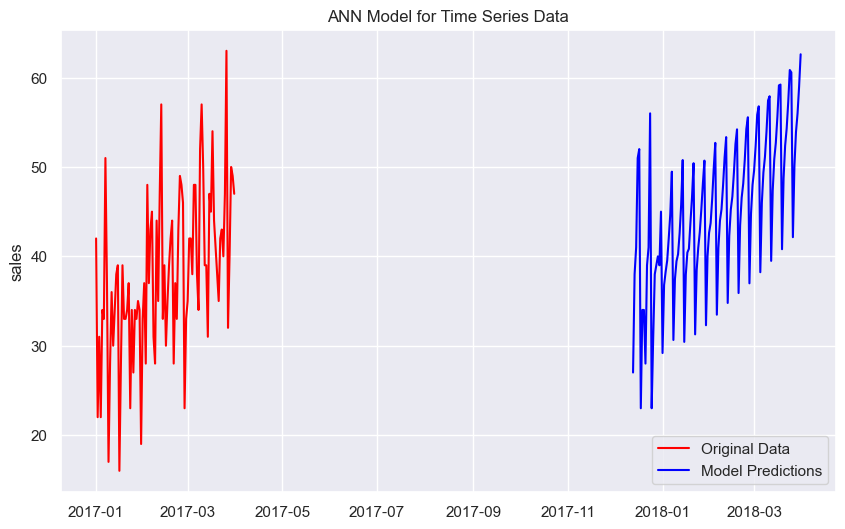

In [54]:
plt.rcParams['figure.figsize']=(10, 6)
plt.plot(dataset_series['sales'][1412:1502], label='Original Data', color='red')
plt.plot(new_data[30:139], label='Model Predictions', color='blue')
plt.ylabel('sales')
plt.title('ANN Model for Time Series Data')
plt.legend()
plt.show()